In [135]:
filename = 'African Drum Music-wXV39pybgJU-sm.wav'

In [136]:
from scipy.io.wavfile import read, write
from librosa.core import stft, istft

# load wav data
_, y = read(filename)

/home/dwiel/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:42: WavFileWarning: Unknown wave file format
  warnings.warn("Unknown wave file format", WavFileWarning)


In [495]:
# convert timeseries wav data into spectrogram data
D = stft(y)

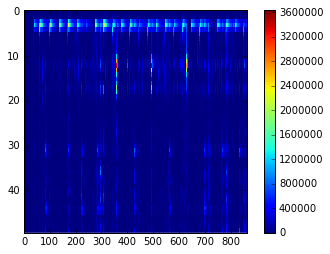

In [496]:
imshowsq(np.abs(D)[:50,:])

In [497]:
slice = np.ones(D.shape[0], dtype=bool)

In [498]:
# get rid of huge swath of frequence data
# slice[:] = False
# slice[4] = True
# slice[12] = True
# slice[18] = True
# slice[30:] = False
# slice[:10] = False
# of whats left, get rid of a lot more though cut every other frequency band and then every third
# slice[::2] = False
# slice[::3] = False

In [499]:
# only 7 complex numbers are left out of 1025
sum(slice), len(slice)

(1025, 1025)

In [500]:
# slice D to lower size
D[slice,:].shape

(1025, 865)

In [501]:
D2 = D[slice,:]

In [502]:
# remove phase of high freq
D2[50:] = np.abs(D2[50:]) + (0 * 1j)

In [503]:
D3 = np.zeros(D.shape, dtype='complex')

In [504]:
D3[slice,:] = D2

In [505]:
# and then back to timeseries wav
back_y = istft(D3)

In [506]:
# convert back_y into int16 or whatever the file format has.  otherwise back_y is float
back_y = np.array(back_y, dtype=y.dtype)

In [507]:
D2.shape, D.shape

((1025, 865), (1025, 865))

In [508]:
play(back_y)

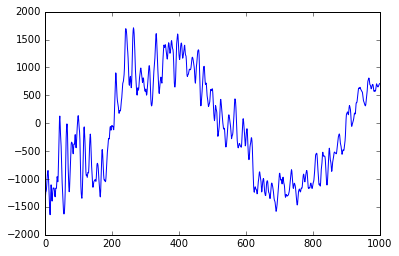

In [411]:
plot(y[100000:101000])

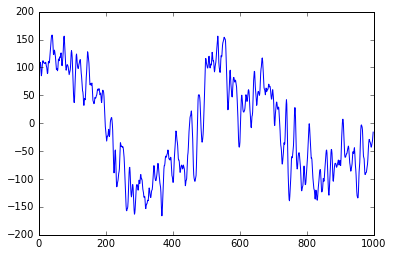

In [412]:
plot(back_y[100000:101000])

In [420]:
back_y_shift = np.concatenate([np.zeros(250), back_y])

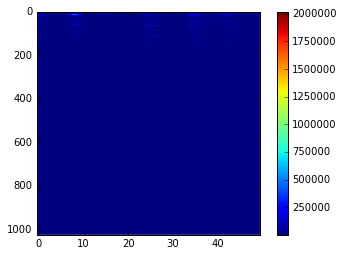

In [421]:
imshowsq(np.abs(D)[:,100:150])

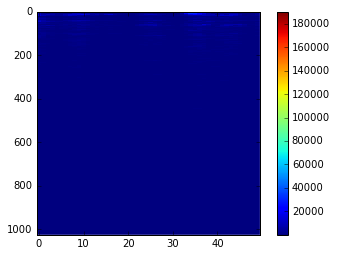

In [422]:
imshowsq(np.abs(stft(back_y))[:,100:150])

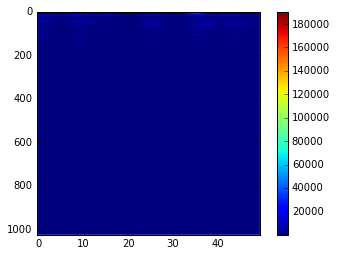

In [423]:
imshowsq(np.abs(stft(back_y_shift))[:,100:150])

In [424]:
# write test-out for listening
write('test-out.wav', 44100, back_y)

In [222]:
# a measure of how different y and y->fft->back_y are
sum(abs(y - back_y))/len(y)

ValueError: operands could not be broadcast together with shapes (442368,) (7776,) 

In [146]:
# the shape of the input and output are the same
print y.shape
print back_y.shape

(442368,)
(442368,)


y is roughly 44100 samples/second * 60 seconds.  I'm not sure why its off by 16 ...

In [147]:
y.shape[0], 44100 * 60

(442368, 2646000)

Default FFT window size is 2048.  Default hop_length is 2048/4

In [61]:
# roughly matches 5169 above
print D.shape
print len(y)/2048. * 4.

(1025, 5169)
5168.0


In [62]:
# windows are roughly 11ms long
1000/(5169/60.)

11.607661056297156

In [63]:
# D has twice as many values as y
float(D.shape[0] * D.shape[1]) / len(y)

2.002340499830689

In [104]:
x = numpy.array([D.real, D.imag])

In [107]:
# x is now shape 2, freq, samples

In [108]:
x.shape

(2, 1025, 5169)

In [109]:
# and to convert back into complex for conversion back to wav

In [110]:
D2 = x[0,:,:] + (x[1,:,:] * 1j)

In [111]:
sum(D - D2)

0j

In [81]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
import numpy as np
from librosa.core import stft, istft

from play import play

In [83]:
# freq = 1981
freq = 2000
gensin = np.sin(np.linspace(0, freq*np.pi, 44100)) * 2**15

In [84]:
gensin = np.array(gensin, dtype='int16')

In [85]:
play(gensin)

In [86]:
dsin = stft(gensin, n_fft=2048, hop_length=2048)

In [104]:
def imshowsq(m):
    """ A helper for showing spectrograms forces to square aspect ratio with no interpolation """
    imshow(m, aspect=float(m.shape[1]) / m.shape[0], interpolation='none')
    colorbar()

In [105]:
binlo = 38
binhi = 54

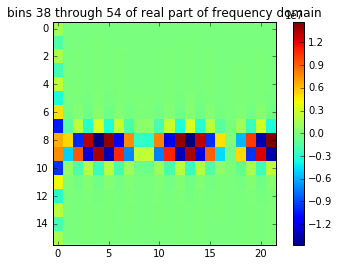

In [106]:
imshowsq(dsin.real[binlo:binhi,:])
title('bins {} through {} of real part of frequency domain'.format(binlo, binhi))

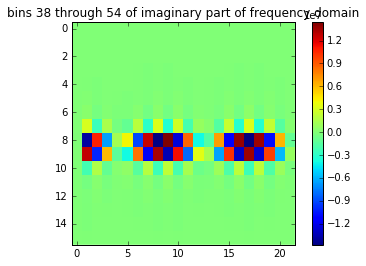

In [107]:
imshowsq(dsin.imag[binlo:binhi,:])
title('bins {} through {} of imaginary part of frequency domain'.format(binlo, binhi))

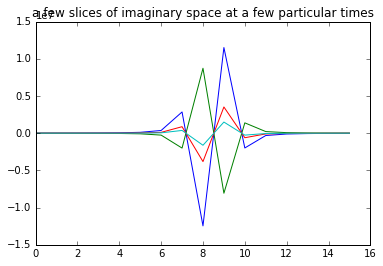

In [108]:
plot(dsin.imag[binlo:binhi,10])
plot(dsin.imag[binlo:binhi,11])
plot(dsin.imag[binlo:binhi,12])
plot(dsin.imag[binlo:binhi,13])
title('a few slices of imaginary space at a few particular times')

### See [here](http://music.columbia.edu/cmc/MusicAndComputers/popups/chapter3/xbit_3_3.php) for real/imaginary vs magnitude/phase

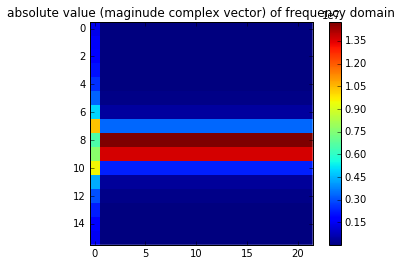

In [113]:
imshowsq(abs(dsin)[binlo:binhi,:])
title('absolute value (maginude complex vector) of frequency domain')

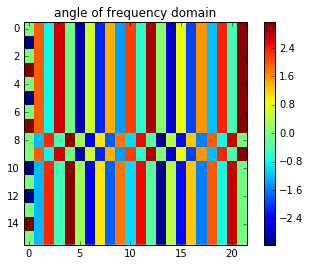

In [114]:
imshowsq(np.angle(dsin)[binlo:binhi,:])
title('angle of frequency domain')

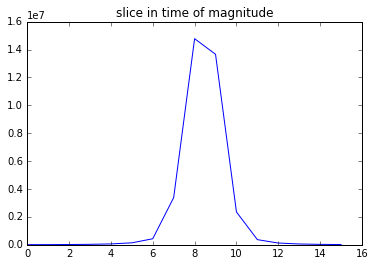

In [118]:
plot(np.abs(dsin)[38:54,11])
title('slice in time of magnitude')

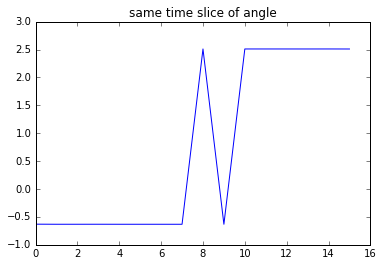

In [119]:
plot(np.angle(dsin)[38:54,11])
title('same time slice of angle')

(18, 74)

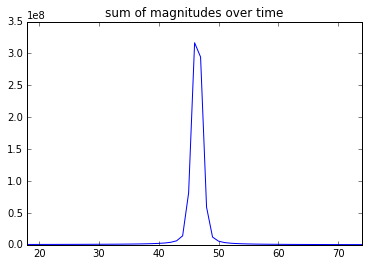

In [126]:
plot(np.sum(abs(dsin), axis=1))
title('sum of magnitudes over time')
xlim(binlo-20,binhi+20)

(18, 74)

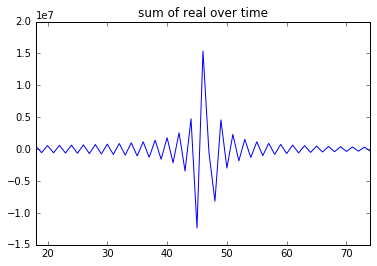

In [128]:
plot(np.sum(dsin.real, axis=1))
title('sum of real over time')
xlim(binlo-20,binhi+20)

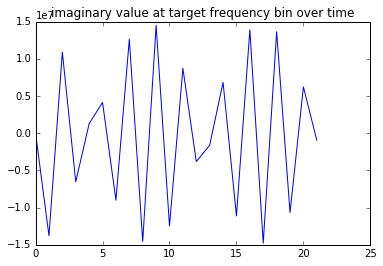

In [131]:
# this appears to be some beat frequency combining sin frequency and fft window frequency
plot(dsin.imag[46,:])
title('imaginary value at target frequency bin over time')

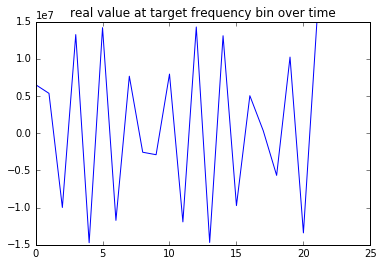

In [132]:
plot(dsin.real[46,:])
title('real value at target frequency bin over time')

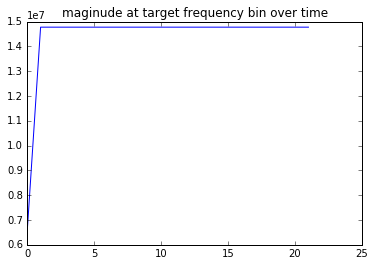

In [133]:
plot(np.abs(dsin[46,:]))
title('maginude at target frequency bin over time')

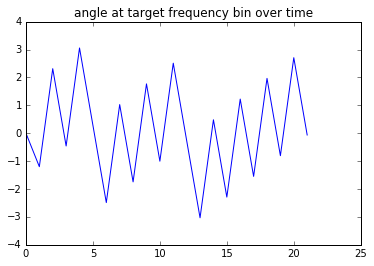

In [134]:
plot(np.angle(dsin)[46,:])
title('angle at target frequency bin over time')

In [78]:
np.fft.fftfreq(dsin.shape[0])*44100

array([   0.        ,   43.02439024,   86.04878049, ..., -129.07317073,
        -86.04878049,  -43.02439024])

In [79]:
# given number of bins in freq space in D and sample rate, lookup
# frequence of sound in bin 46 which matches ~2khz sin wave
# generated above
(np.fft.fftfreq(dsin.shape[0])*44100)[46]

1979.1219512195121

(0, 1025)

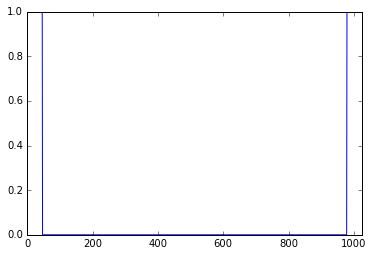

In [80]:
# http://stackoverflow.com/questions/19122157/fft-bandpass-filter-in-python
# a low pass filter requires cutting signal on both ends of
# frequency dimension coming out of fft
# plot(abs(np.fft.fftfreq(dsin.shape[0])*44100) < 22020)
plot(abs(np.fft.fftfreq(dsin.shape[0])*44100) < 2000)
xlim((0,dsin.shape[0]))

In [59]:
# therefor, if there is going to be a bandpass filter 
# layer of some kind, it will likely make sense to have
# it symetric in this mirrored space in D

In [1289]:
y.shape

(2646016,)

In [1290]:
def play(audio):
    import pyaudio

    # instantiate PyAudio (1)
    p = pyaudio.PyAudio()

    # open stream (2), 2 is size in bytes of int16
    stream = p.open(format=p.get_format_from_width(2),
                    channels=1,
                    rate=44100,
                    output=True)

    # play stream (3), blocking call
    stream.write(audio)

    # stop stream (4)
    stream.stop_stream()
    stream.close()

    # close PyAudio (5)
    p.terminate()

In [1291]:
back_y = np.array(back_y, dtype=y.dtype)

In [1306]:
play(back_y[:44100*5])

In [1650]:
# gend = np.eye(D.shape[0]) * 100000000
l = 250
i = 15
gend = np.zeros((D.shape[0], l))
#gend[i-1,:] = 1e7
gend[i,:] = 1e7
# gend[i,:] = 1e7 * np.random.random(l)
# gend[i+1,:] = 1e7 * -0.5
# gend[47,:] = 1e7 * -0.5
# gend[46,:] = 2**15

In [1651]:
gendi = np.zeros((D.shape[0], l))
# gendi = np.random.random((D.shape[0], l)) * 2**20
# gendi[45:47,:] = np.random.random((2, l)) * 1e7
# gendi[100,:] = np.sin(np.linspace(-100*np.pi, 100*np.pi, D.shape[0])) * 2**15

In [1652]:
gend = gend + (gendi * 1j)

In [1653]:
# gen = istft(gend, window=np.hanning)
gen = istft(gend)

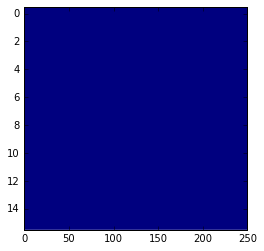

In [1654]:
imshowsq(abs(gend)[38:54,:])

In [1655]:
max(gen) / 2.0**15

0.25706663727760315

In [1656]:
# run signal through 'compressor' so that signal uses full amplitude range
gen *= (2.0**15 - 1) / max(gen)

In [1657]:
max_volume = max(gen) / 2.0**15
print max_volume
assert max_volume < 1

0.999969482422


In [1658]:
gen = np.array(gen, dtype='int16')

In [1659]:
gen

array([-30390, -29620, -28785, ..., -27887, -28785, -29620], dtype=int16)

In [1660]:
len(gen) / 44100.

2.8908843537414968

In [1661]:
play(gen)

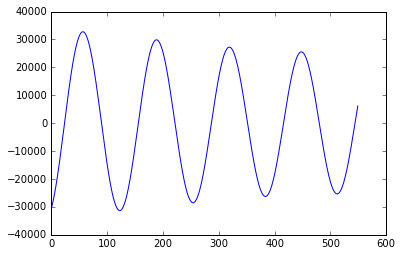

In [1662]:
plot(gen[:550])

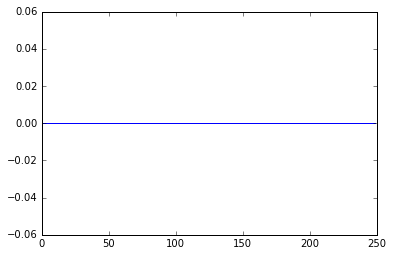

In [1523]:
plot(gendi[100,000:600])

In [1524]:
gend1 = stft(gen)

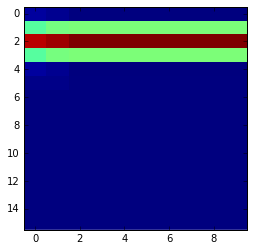

In [1525]:
imshowsq(np.abs(gend1)[38:54,:10])

In [164]:
import time

# instantiate PyAudio (1)
p = pyaudio.PyAudio()

class WavIO(object):
    def __init__(self, y):
        self.y = y
        self.i = 0
    
    def getnchannels(self):
        if len(self.y.shape) == 1:
            return 1
        else:
            raise NotImplemented
    
    def getsampwidth(self):
        return 2
    
    def getframerate(self):
        return 44100

    def readframes(self, size):
        buf = self.y[self.i:self.i + size]
        self.i += size
        return buf.astype('int16')
    
    def close(self):
        pass
    
wio = WavIO(y)

# define callback (2)
def callback(in_data, frame_count, time_info, status):
    data = wio.readframes(frame_count)
    return (data, pyaudio.paContinue)

print p.get_format_from_width(1)
print p.get_format_from_width(2)
print p.get_format_from_width(4)

# open stream using callback (3)
stream = p.open(format=p.get_format_from_width(wio.getsampwidth()),
                channels=wio.getnchannels(),
                rate=wio.getframerate(),
                output=True,
                stream_callback=callback)

# start the stream (4)
stream.start_stream()

# wait for stream to finish (5)
while stream.is_active():
    time.sleep(0.1)

# stop stream (6)
stream.stop_stream()
stream.close()
wio.close()

# close PyAudio (7)
p.terminate()

32
8
1
